### 전처리

In [1]:
# 독립 변수 파일 불러오기
import pandas as pd
import numpy as np

df_cpi = pd.read_csv('c:/프로젝트/Data/소비자물가지수_총지수_07-23.csv')
df_cpi_X = pd.read_csv('c:/프로젝트/Data/소비자물가지수_항목별_07-23.csv')
df_RT = pd.read_csv('c:/프로젝트/Data/시장금리(월)_07-23.csv')
df_RT_M = pd.read_csv('c:/프로젝트/Data/대출금리(신규기준)_07-23.csv')
df_FE = pd.read_csv('c:/프로젝트/Data/주요국대원화환율_07-23.csv')
df_ST = pd.read_csv('c:/프로젝트/Data/주식시장(월)_07-23.CSV')
 

In [2]:
# 파일 합치기
df_X=pd.concat([df_cpi, df_cpi_X, df_RT, df_RT_M, df_FE, df_ST], axis=1)
df_X.head(3)

,계정항목,소비자물가지수,계정항목,주택임차료,전세,월세,주거시설 유지·보수,상하수도료,상수도료,하수도료,...,계정항목,주택담보대출,계정항목,미국달러,위안,일본엔,유로,계정항목,KOSPI_종가,KOSDAQ_종가
0,단위,2020=100,단위,2020=100,2020=100,2020=100,2020=100,2020=100,2020=100,2020=100,...,단위,연%,단위,원,원,원,원,단위,1980.01.04=100,1996.07.01=1000
1,2007/01,76.496,2007/01,77.038,71.11,87.931,63.595,64.505,83.112,36.86,...,2007/01,6.11,2007/01,940.9,NaN,7.731,1220.07,2007/01,1360.23,576.37
2,2007/02,77.017,2007/02,77.19,71.251,88.019,63.657,64.505,82.877,37.185,...,2007/02,6.18,2007/02,938.3,NaN,7.9389,1241.89,2007/02,1417.34,600.93


In [3]:
# 컬럼 '년월' 생성 
df_X['년월']=df_X.iloc[:,[0]]
df_X.head(3)

,계정항목,소비자물가지수,계정항목,주택임차료,전세,월세,주거시설 유지·보수,상하수도료,상수도료,하수도료,...,주택담보대출,계정항목,미국달러,위안,일본엔,유로,계정항목,KOSPI_종가,KOSDAQ_종가,년월
0,단위,2020=100,단위,2020=100,2020=100,2020=100,2020=100,2020=100,2020=100,2020=100,...,연%,단위,원,원,원,원,단위,1980.01.04=100,1996.07.01=1000,단위
1,2007/01,76.496,2007/01,77.038,71.11,87.931,63.595,64.505,83.112,36.86,...,6.11,2007/01,940.9,NaN,7.731,1220.07,2007/01,1360.23,576.37,2007/01
2,2007/02,77.017,2007/02,77.19,71.251,88.019,63.657,64.505,82.877,37.185,...,6.18,2007/02,938.3,NaN,7.9389,1241.89,2007/02,1417.34,600.93,2007/02


In [4]:
# 중복 컬럼 '계정항목' 삭제
df_X.drop('계정항목', axis=1, inplace=True)
df_X.head(3) 


,소비자물가지수,주택임차료,전세,월세,주거시설 유지·보수,상하수도료,상수도료,하수도료,공동주택관리비,전기,...,국고채(1년),국고채(10년),주택담보대출,미국달러,위안,일본엔,유로,KOSPI_종가,KOSDAQ_종가,년월
0,2020=100,2020=100,2020=100,2020=100,2020=100,2020=100,2020=100,2020=100,2020=100,2020=100,...,연%,연%,연%,원,원,원,원,1980.01.04=100,1996.07.01=1000,단위
1,76.496,77.038,71.11,87.931,63.595,64.505,83.112,36.86,58.278,104.498,...,4.98,5.04,6.11,940.9,NaN,7.731,1220.07,1360.23,576.37,2007/01
2,77.017,77.19,71.251,88.019,63.657,64.505,82.877,37.185,59.47,104.498,...,4.96,5.01,6.18,938.3,NaN,7.9389,1241.89,1417.34,600.93,2007/02


In [5]:
# 불필요한 열(단위) 삭제 
df_X.drop(range(1), axis=0, inplace=True)
df_X

,소비자물가지수,주택임차료,전세,월세,주거시설 유지·보수,상하수도료,상수도료,하수도료,공동주택관리비,전기,...,국고채(1년),국고채(10년),주택담보대출,미국달러,위안,일본엔,유로,KOSPI_종가,KOSDAQ_종가,년월
1,76.496,77.038,71.11,87.931,63.595,64.505,83.112,36.86,58.278,104.498,...,4.98,5.04,6.11,940.9,NaN,7.731,1220.07,1360.23,576.37,2007/01
2,77.017,77.19,71.251,88.019,63.657,64.505,82.877,37.185,59.47,104.498,...,4.96,5.01,6.18,938.3,NaN,7.9389,1241.89,1417.34,600.93,2007/02
3,77.464,77.265,71.389,88.019,63.719,64.685,83.112,37.282,59.307,104.498,...,4.89,4.94,6.2,940.3,NaN,7.97,1253.94,1452.55,648.99,2007/03
4,77.761,77.418,71.529,88.106,63.719,64.744,83.191,37.282,58.711,104.498,...,4.97,5.07,6.13,929.4,NaN,7.7833,1266.91,1542.24,675.88,2007/04
5,77.836,77.494,71.669,88.106,63.78,64.744,83.191,37.282,58.765,104.498,...,5.11,5.22,6.17,929.9,NaN,7.6475,1249,1700.91,747.87,2007/05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,109.21,103.65,105.13,101.85,114.51,106.35,104.95,108.51,112.47,124.95,...,3.602,4.267,4.82,1419.3,195.94,9.6119,1413.34,2293.61,695.33,2022/10
191,109.1,103.77,105.28,101.92,114.61,106.35,104.95,108.51,111.34,124.95,...,3.838,3.915,4.74,1331.5,184.64,9.5954,1374.31,2472.53,729.54,2022/11
192,109.28,103.84,105.35,102.01,114.66,106.81,105.5,108.85,112.26,124.95,...,3.705,3.541,4.63,1267.3,181.44,9.5318,1351.2,2236.4,679.29,2022/12
193,110.1,103.91,105.42,102.07,115.06,109.64,109.06,110.53,112.49,136.48,...,3.584,3.411,4.58,1228.7,182.09,9.4222,1332.83,2425.08,740.49,2023/01


In [6]:
# 컬럼 공백 제거 
df_X.columns= df_X.columns.str.lstrip()
df_X.columns

Index(['소비자물가지수', '주택임차료', '전세', '월세', '주거시설 유지·보수', '상하수도료', '상수도료', '하수도료',
       '공동주택관리비', '전기', '가스', '등유', '지역난방비', '무담보콜금리(1일)', 'KORIBOR(3개월)',
       'CD(91일)', '국고채(1년)', '국고채(10년)', '주택담보대출', '미국달러', '위안', '일본엔', '유로',
       'KOSPI_종가', 'KOSDAQ_종가', '년월'],
      dtype='object')

In [7]:
# 불필요한 행 (항목별 합계) 삭제 
df_X.drop(['주거시설 유지·보수', '상하수도료'], axis=1, inplace=True)
df_X.head(3)

,소비자물가지수,주택임차료,전세,월세,상수도료,하수도료,공동주택관리비,전기,가스,등유,...,국고채(1년),국고채(10년),주택담보대출,미국달러,위안,일본엔,유로,KOSPI_종가,KOSDAQ_종가,년월
1,76.496,77.038,71.11,87.931,83.112,36.86,58.278,104.498,86.637,101.027,...,4.98,5.04,6.11,940.9,NaN,7.731,1220.07,1360.23,576.37,2007/01
2,77.017,77.19,71.251,88.019,82.877,37.185,59.47,104.498,87.016,99.521,...,4.96,5.01,6.18,938.3,NaN,7.9389,1241.89,1417.34,600.93,2007/02
3,77.464,77.265,71.389,88.019,83.112,37.282,59.307,104.498,85.119,101.027,...,4.89,4.94,6.2,940.3,NaN,7.97,1253.94,1452.55,648.99,2007/03


In [8]:
df_X.head().transpose()

,1,2,3,4,5
소비자물가지수,76.496,77.017,77.464,77.761,77.836
주택임차료,77.038,77.19,77.265,77.418,77.494
전세,71.11,71.251,71.389,71.529,71.669
월세,87.931,88.019,88.019,88.106,88.106
상수도료,83.112,82.877,83.112,83.191,83.191
하수도료,36.86,37.185,37.282,37.282,37.282
공동주택관리비,58.278,59.47,59.307,58.711,58.765
전기,104.498,104.498,104.498,104.498,104.498
가스,86.637,87.016,85.119,85.119,88.229
등유,101.027,99.521,101.027,103.936,105.642


In [9]:
# 컬럼 명 변경
df_X.rename(columns={
    '주택임차료':'주택임차료물가지수','전세':'전세물자지수', '월세':'월세물가지수','상수도료':'상수도료물가지수',
    '하수도료':'하수도료물가지수', '공동주택관리비':'공동주택관리비물가지수','전기':'전기물가지수', '가스':'가스물가지수', 
    '등유':'등유물가지수','지역난방비':'지역난방물가지수','무담보콜금리':'콜금리', '주택담보대출':'주택담보대출금리',
    '미국달러':'미달러환율', '위안':'위안화환율', '일본엔':'일본엔환율', '유로':'유로환율','KOSPI_종가':'KOSPI', 'KOSDAQ_종가':'KOSDAQ'},
     inplace=True)

In [10]:
# 인덱스 '년월'로 설정  
df_X.set_index(['년월'], inplace=True)


In [11]:
df_X

,소비자물가지수,주택임차료물가지수,전세물자지수,월세물가지수,상수도료물가지수,하수도료물가지수,공동주택관리비물가지수,전기물가지수,가스물가지수,등유물가지수,...,CD(91일),국고채(1년),국고채(10년),주택담보대출금리,미달러환율,위안화환율,일본엔환율,유로환율,KOSPI,KOSDAQ
년월,,,,,,,,,,,,,,,,,,,,,
2007/01,76.496,77.038,71.11,87.931,83.112,36.86,58.278,104.498,86.637,101.027,...,4.92,4.98,5.04,6.11,940.9,NaN,7.731,1220.07,1360.23,576.37
2007/02,77.017,77.19,71.251,88.019,82.877,37.185,59.47,104.498,87.016,99.521,...,4.95,4.96,5.01,6.18,938.3,NaN,7.9389,1241.89,1417.34,600.93
2007/03,77.464,77.265,71.389,88.019,83.112,37.282,59.307,104.498,85.119,101.027,...,4.94,4.89,4.94,6.2,940.3,NaN,7.97,1253.94,1452.55,648.99
2007/04,77.761,77.418,71.529,88.106,83.191,37.282,58.711,104.498,85.119,103.936,...,4.95,4.97,5.07,6.13,929.4,NaN,7.7833,1266.91,1542.24,675.88
2007/05,77.836,77.494,71.669,88.106,83.191,37.282,58.765,104.498,88.229,105.642,...,5.04,5.11,5.22,6.17,929.9,NaN,7.6475,1249,1700.91,747.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022/10,109.21,103.65,105.13,101.85,104.95,108.51,112.47,124.95,129.32,185.26,...,3.69,3.602,4.267,4.82,1419.3,195.94,9.6119,1413.34,2293.61,695.33
2022/11,109.1,103.77,105.28,101.92,104.95,108.51,111.34,124.95,129.28,185.6,...,3.99,3.838,3.915,4.74,1331.5,184.64,9.5954,1374.31,2472.53,729.54
2022/12,109.28,103.84,105.35,102.01,105.5,108.85,112.26,124.95,129.26,181.29,...,4.02,3.705,3.541,4.63,1267.3,181.44,9.5318,1351.2,2236.4,679.29


In [12]:
# 결측치 및 type 확인 
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 2007/01 to 2023/02
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   소비자물가지수       194 non-null    object
 1   주택임차료물가지수     194 non-null    object
 2   전세물자지수        194 non-null    object
 3   월세물가지수        194 non-null    object
 4   상수도료물가지수      194 non-null    object
 5   하수도료물가지수      194 non-null    object
 6   공동주택관리비물가지수   194 non-null    object
 7   전기물가지수        194 non-null    object
 8   가스물가지수        194 non-null    object
 9   등유물가지수        194 non-null    object
 10  지역난방물가지수      194 non-null    object
 11  무담보콜금리(1일)    194 non-null    object
 12  KORIBOR(3개월)  194 non-null    object
 13  CD(91일)       194 non-null    object
 14  국고채(1년)       194 non-null    object
 15  국고채(10년)      194 non-null    object
 16  주택담보대출금리      193 non-null    object
 17  미달러환율         194 non-null    object
 18  위안화환율         86 non-null     object
 19  일본엔

In [13]:
df_X

,소비자물가지수,주택임차료물가지수,전세물자지수,월세물가지수,상수도료물가지수,하수도료물가지수,공동주택관리비물가지수,전기물가지수,가스물가지수,등유물가지수,...,CD(91일),국고채(1년),국고채(10년),주택담보대출금리,미달러환율,위안화환율,일본엔환율,유로환율,KOSPI,KOSDAQ
년월,,,,,,,,,,,,,,,,,,,,,
2007/01,76.496,77.038,71.11,87.931,83.112,36.86,58.278,104.498,86.637,101.027,...,4.92,4.98,5.04,6.11,940.9,NaN,7.731,1220.07,1360.23,576.37
2007/02,77.017,77.19,71.251,88.019,82.877,37.185,59.47,104.498,87.016,99.521,...,4.95,4.96,5.01,6.18,938.3,NaN,7.9389,1241.89,1417.34,600.93
2007/03,77.464,77.265,71.389,88.019,83.112,37.282,59.307,104.498,85.119,101.027,...,4.94,4.89,4.94,6.2,940.3,NaN,7.97,1253.94,1452.55,648.99
2007/04,77.761,77.418,71.529,88.106,83.191,37.282,58.711,104.498,85.119,103.936,...,4.95,4.97,5.07,6.13,929.4,NaN,7.7833,1266.91,1542.24,675.88
2007/05,77.836,77.494,71.669,88.106,83.191,37.282,58.765,104.498,88.229,105.642,...,5.04,5.11,5.22,6.17,929.9,NaN,7.6475,1249,1700.91,747.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022/10,109.21,103.65,105.13,101.85,104.95,108.51,112.47,124.95,129.32,185.26,...,3.69,3.602,4.267,4.82,1419.3,195.94,9.6119,1413.34,2293.61,695.33
2022/11,109.1,103.77,105.28,101.92,104.95,108.51,111.34,124.95,129.28,185.6,...,3.99,3.838,3.915,4.74,1331.5,184.64,9.5954,1374.31,2472.53,729.54
2022/12,109.28,103.84,105.35,102.01,105.5,108.85,112.26,124.95,129.26,181.29,...,4.02,3.705,3.541,4.63,1267.3,181.44,9.5318,1351.2,2236.4,679.29


In [14]:
#한글폰트 설치
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/MALGUN.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [15]:
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

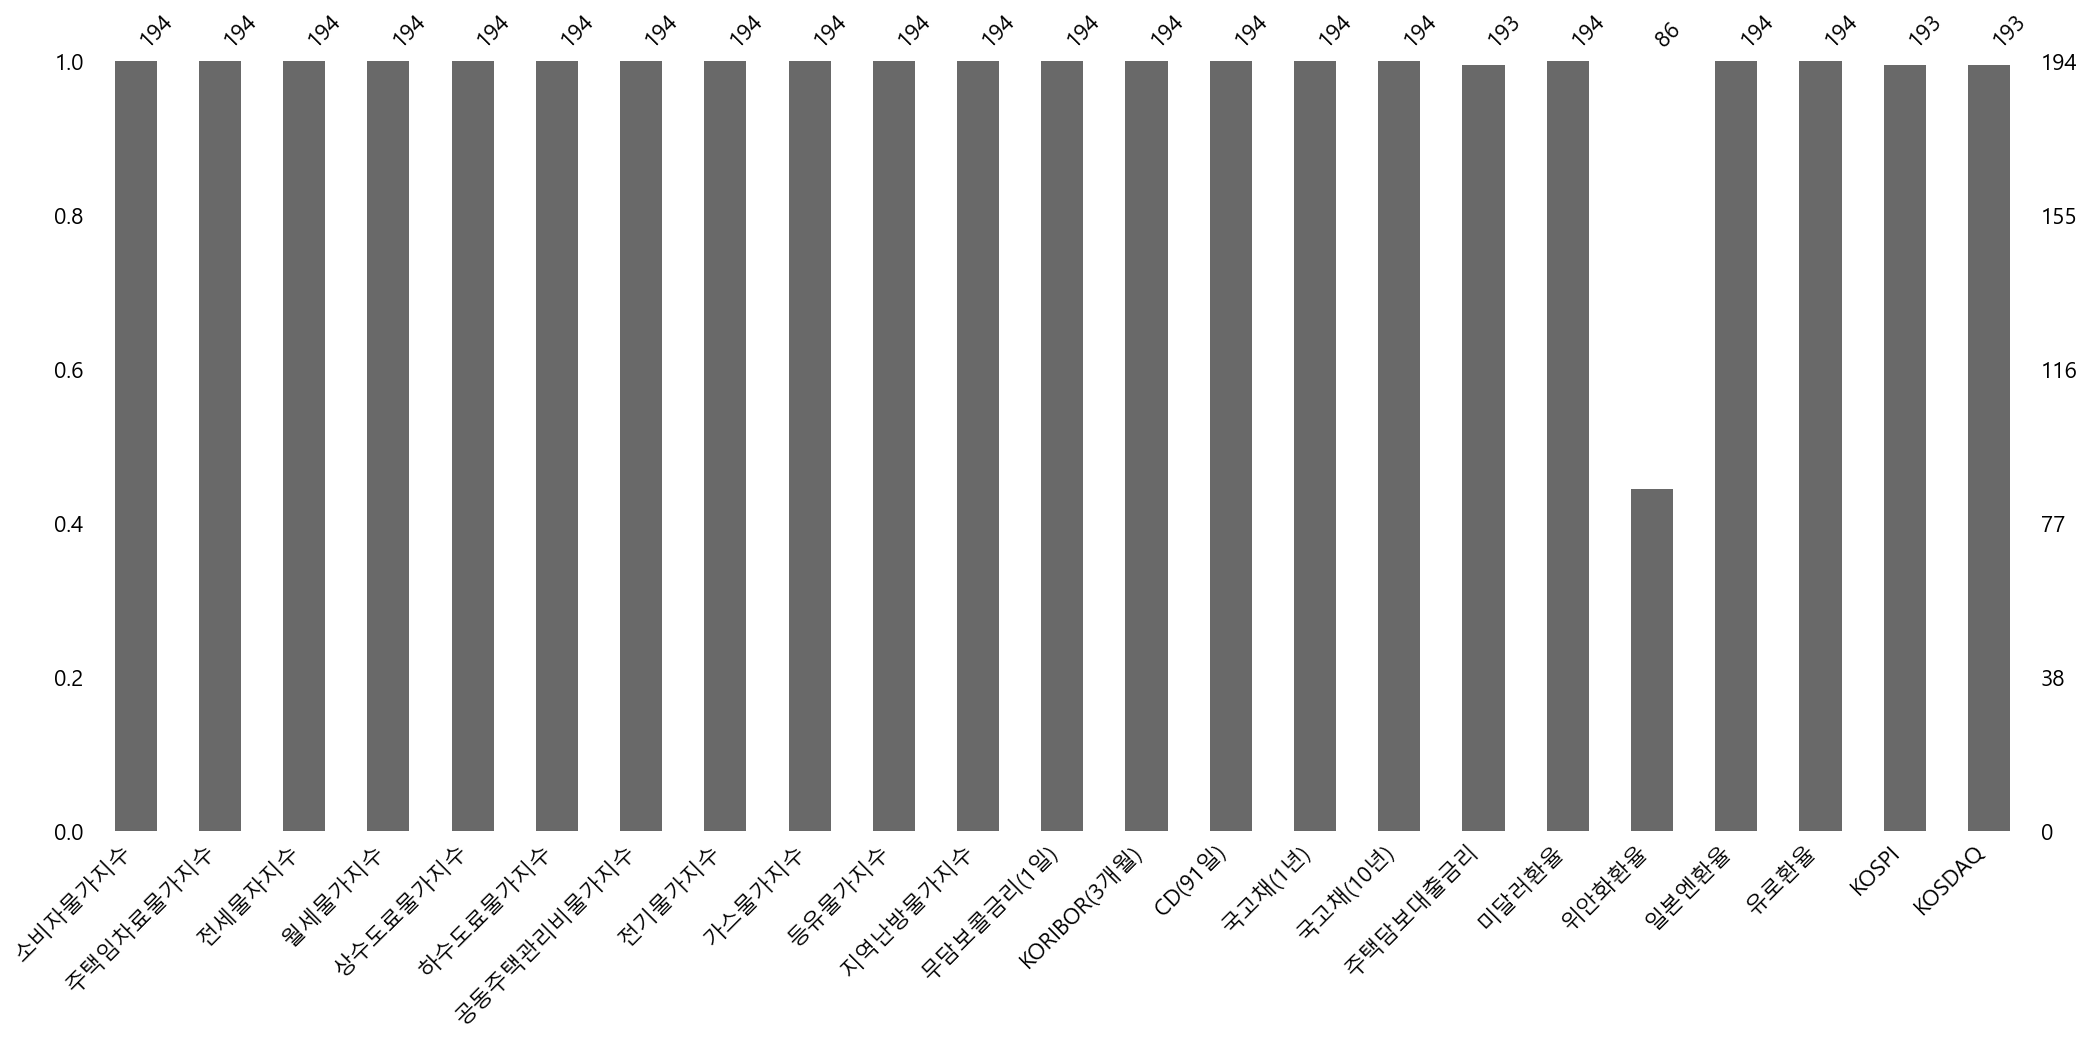

In [16]:
# 결측치 수 확인 
msno.bar(df_X)

In [17]:
# 결측치 '평균값'으로 설정  
from sklearn.impute import SimpleImputer
imputer = SimpleImputer (strategy = "mean")
df_X= pd.DataFrame(imputer.fit_transform(df_X), columns=df_X.columns)  

In [18]:
df_X

,소비자물가지수,주택임차료물가지수,전세물자지수,월세물가지수,상수도료물가지수,하수도료물가지수,공동주택관리비물가지수,전기물가지수,가스물가지수,등유물가지수,...,CD(91일),국고채(1년),국고채(10년),주택담보대출금리,미달러환율,위안화환율,일본엔환율,유로환율,KOSPI,KOSDAQ
0,76.496,77.038,71.110,87.931,83.112,36.860,58.278,104.498,86.637,101.027,...,4.92,4.980,5.040,6.110000,940.9,173.812326,7.7310,1220.07,1360.230000,576.370000
1,77.017,77.190,71.251,88.019,82.877,37.185,59.470,104.498,87.016,99.521,...,4.95,4.960,5.010,6.180000,938.3,173.812326,7.9389,1241.89,1417.340000,600.930000
2,77.464,77.265,71.389,88.019,83.112,37.282,59.307,104.498,85.119,101.027,...,4.94,4.890,4.940,6.200000,940.3,173.812326,7.9700,1253.94,1452.550000,648.990000
3,77.761,77.418,71.529,88.106,83.191,37.282,58.711,104.498,85.119,103.936,...,4.95,4.970,5.070,6.130000,929.4,173.812326,7.7833,1266.91,1542.240000,675.880000
4,77.836,77.494,71.669,88.106,83.191,37.282,58.765,104.498,88.229,105.642,...,5.04,5.110,5.220,6.170000,929.9,173.812326,7.6475,1249.00,1700.910000,747.870000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,109.210,103.650,105.130,101.850,104.950,108.510,112.470,124.950,129.320,185.260,...,3.69,3.602,4.267,4.820000,1419.3,195.940000,9.6119,1413.34,2293.610000,695.330000
190,109.100,103.770,105.280,101.920,104.950,108.510,111.340,124.950,129.280,185.600,...,3.99,3.838,3.915,4.740000,1331.5,184.640000,9.5954,1374.31,2472.530000,729.540000
191,109.280,103.840,105.350,102.010,105.500,108.850,112.260,124.950,129.260,181.290,...,4.02,3.705,3.541,4.630000,1267.3,181.440000,9.5318,1351.20,2236.400000,679.290000
192,110.100,103.910,105.420,102.070,109.060,110.530,112.490,136.480,129.250,174.570,...,3.80,3.584,3.411,4.580000,1228.7,182.090000,9.4222,1332.83,2425.080000,740.490000


<AxesSubplot:>

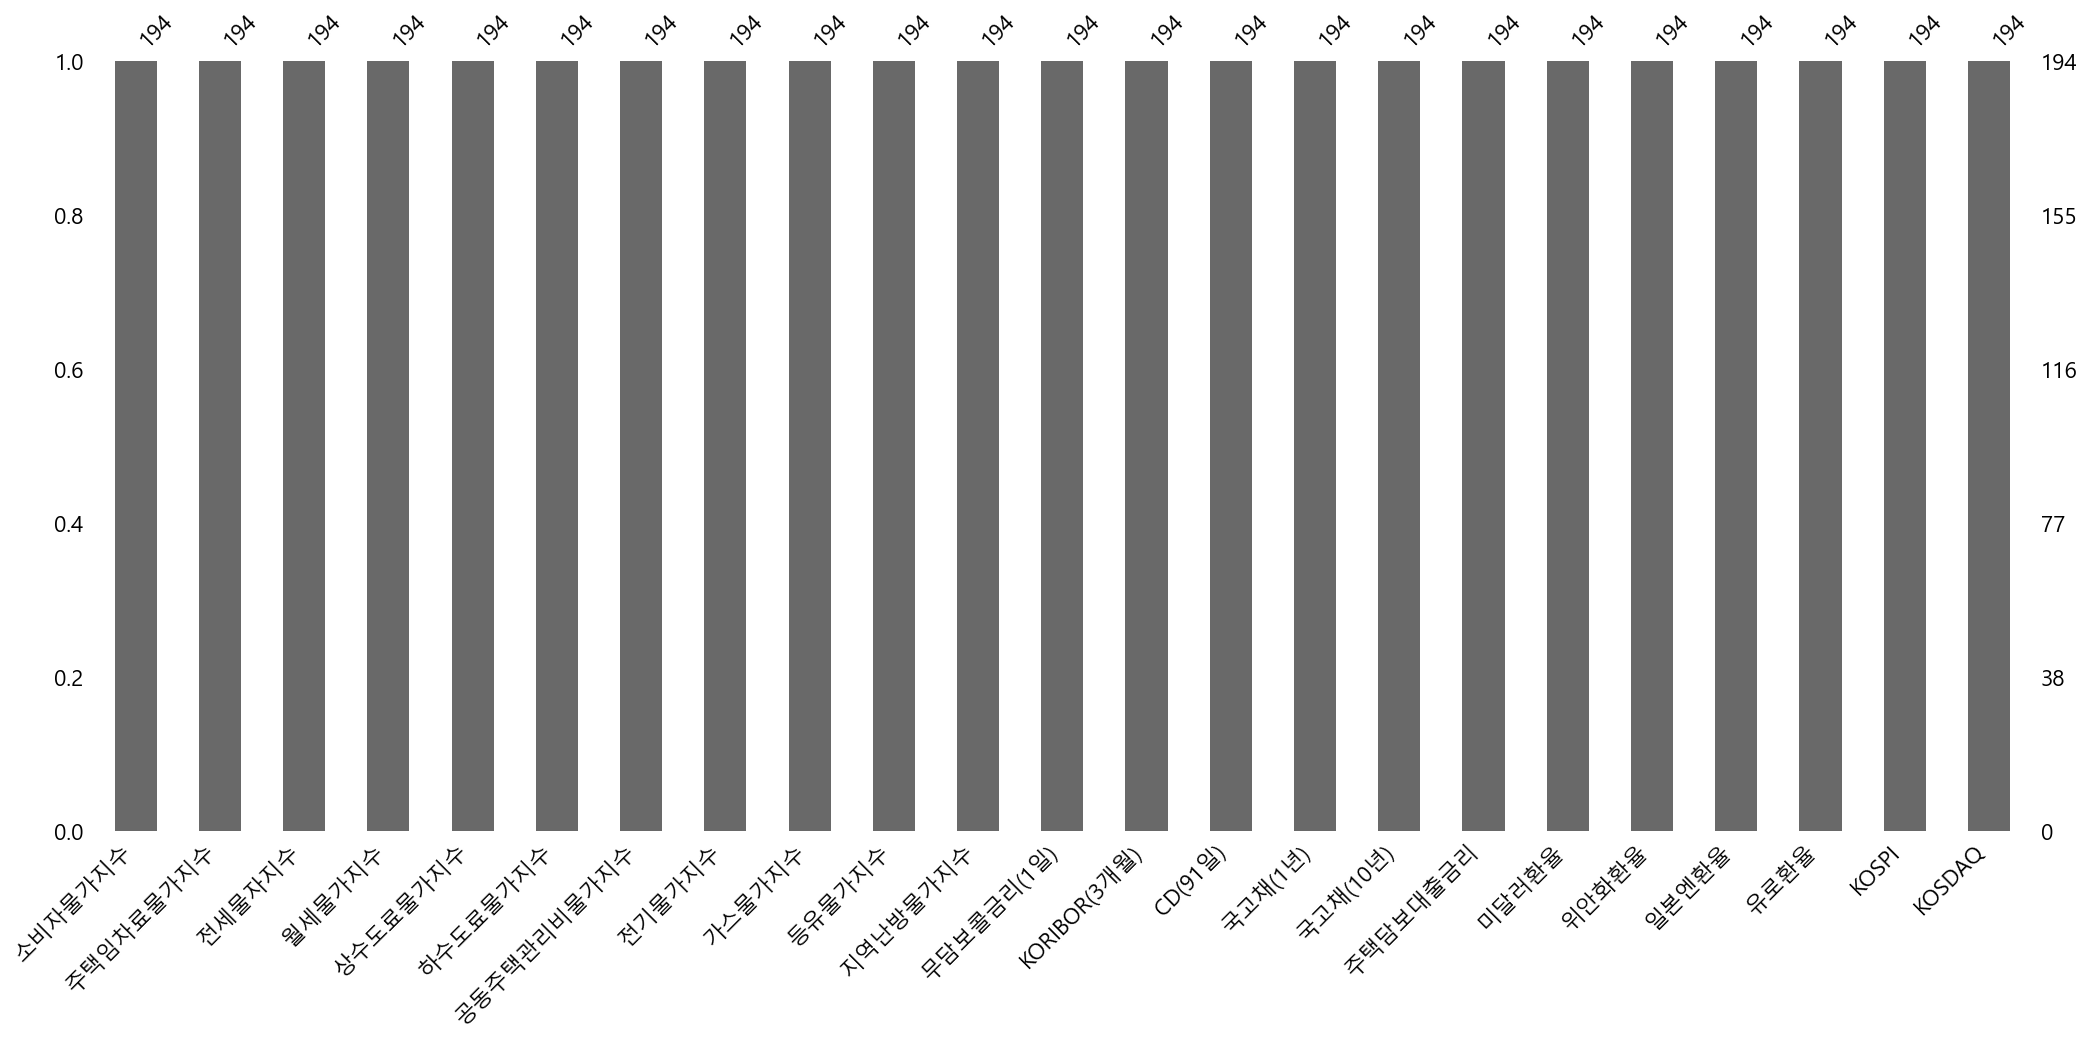

In [19]:
msno.bar(df_X)

In [20]:
df_X.head(3)

,소비자물가지수,주택임차료물가지수,전세물자지수,월세물가지수,상수도료물가지수,하수도료물가지수,공동주택관리비물가지수,전기물가지수,가스물가지수,등유물가지수,...,CD(91일),국고채(1년),국고채(10년),주택담보대출금리,미달러환율,위안화환율,일본엔환율,유로환율,KOSPI,KOSDAQ
0,76.496,77.038,71.110,87.931,83.112,36.860,58.278,104.498,86.637,101.027,...,4.92,4.98,5.04,6.11,940.9,173.812326,7.7310,1220.07,1360.23,576.37
1,77.017,77.190,71.251,88.019,82.877,37.185,59.470,104.498,87.016,99.521,...,4.95,4.96,5.01,6.18,938.3,173.812326,7.9389,1241.89,1417.34,600.93
2,77.464,77.265,71.389,88.019,83.112,37.282,59.307,104.498,85.119,101.027,...,4.94,4.89,4.94,6.20,940.3,173.812326,7.9700,1253.94,1452.55,648.99


In [21]:
df_X.to_csv("c:/프로젝트/회귀분석/부동산분석독립변수_2007-2023.csv", index=False)